In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [138]:
df = pd.read_csv("Ecommerce.csv")

In [139]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [176]:
df_num = df._get_numeric_data()

In [177]:
df = df_num.copy()

### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

In [143]:
import matplotlib.pyplot as plt

Text(18.0, 0.5, 'Yearly Amount Spent')

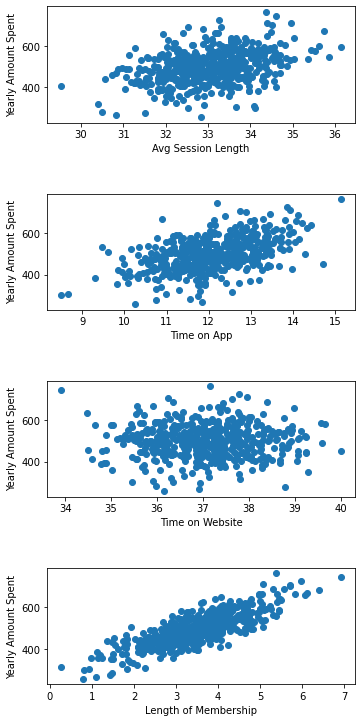

In [144]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['Avg Session Length'], df['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Time on App'], df['Yearly Amount Spent'])
axs[1].set_xlabel('Time on App')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on Website'], df['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(df['Length of Membership'], df['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [145]:
X = df[['Length of Membership', 'Yearly Amount Spent']]

### Divide the dataset into training and test sets with the ratio 80:20.

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train,y_test = train_test_split(df["Length of Membership"], df["Yearly Amount Spent"], 
                                                   test_size=0.2, random_state=42)

In [148]:
print(X_train.shape, y_train.shape)

(400,) (400,)


In [149]:
print(X_test.shape, y_test.shape)

(100,) (100,)


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [150]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    
    # number of observations/points
    n = np.size(data_vector)
 
    # mean of x and y vector
    m_x = np.mean(data_vector)
    m_y = np.mean(response_vector)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(response_vector*data_vector) - n*m_y*m_x
    SS_xx = np.sum(data_vector*data_vector) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [151]:
 b = fit_1d_linear_regression(X_train, y_train)

In [155]:
b

(271.3521128033923, 64.64010065386736)

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [152]:
def plot_fitted_line(b,
                     x,
                     y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    
    y_pred = b[0] + b[1]*x
    
    plt.scatter(x, y,  color='blue')
    # plotting the regression line
    plt.plot(x, y_pred, color = "black")
 
    # putting labels
    plt.xlabel('Length of Membership')
    plt.ylabel('Yearly Amount Spent')
    plt.title("my regression")
 
    # function to show plot
    plt.show()
    #pass

In [173]:
y_pred = b[0] + b[1]*X_test

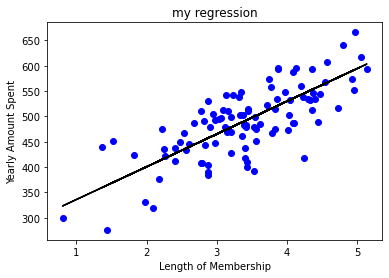

In [153]:
plot_fitted_line(b, X_test, y_test)

### Plot example

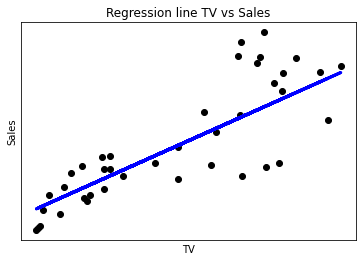

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [115]:
from sklearn.linear_model import LinearRegression

In [159]:
X_train, X_test, y_train,y_test = train_test_split(df[["Length of Membership"]], df["Yearly Amount Spent"], 
                                                   test_size=0.2, random_state=42)

In [160]:
linreg = LinearRegression()

In [161]:
linreg.fit(X_train, y_train)

LinearRegression()

In [162]:
new_y_pred = linreg.predict(X_test)

In [163]:
new_b = linreg.coef_, linreg.intercept_

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [174]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

print('R-squared: %.2f'
      % r2_score(y_test, y_pred))

Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(df_num[df_num.columns.difference(['Yearly Amount Spent'])], df_num["Yearly Amount Spent"])

In [180]:
linreg.fit(X_train, y_train)

LinearRegression()

In [181]:
num_pred = linreg.predict(X_test)

In [182]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, num_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, num_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, num_pred)))

print('R-squared: %.2f'
      % r2_score(y_test, num_pred))

Mean absolute error: 8.88
Mean squared error: 126.08
Root mean squared error: 11.23
R-squared: 0.98
